In [26]:
x = 15
if 10 <= x and x <= 20:
    print('x is between 10 and 20.')


x is between 10 and 20.


[[[  0   0   0]
  [255   0   0]]

 [[  0 255   0]
  [  0   0 255]]]


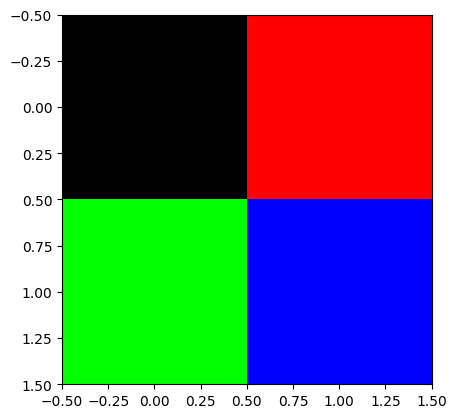

In [20]:
import matplotlib.pyplot as plt
import numpy as np
img = np.array([[[0, 0, 0],[255, 0, 0 ]], [[0, 255, 0],[0, 0, 255]]])
print(img)
plt.imshow(img)
plt.show()

[[[255   0   0]]]
[[[  0 255   0]]]
[[[255 255   0]]]


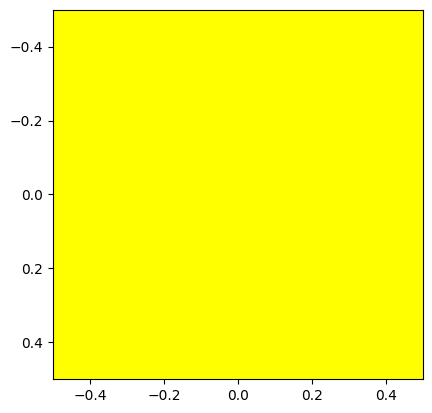

In [37]:
a = np.array([[[255, 0, 0]]]) #3차원 배열 
b = np.array([[[0,255, 0]]])
c = a + b
print(a)
print(b)
print(c)
plt.imshow(c)

In [41]:
a = np.array([[5,2], [3, 4]])
print(a)

[[5 2]
 [3 4]]


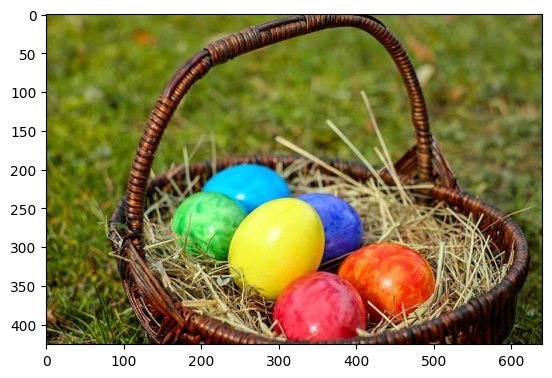

(426, 640, 3)


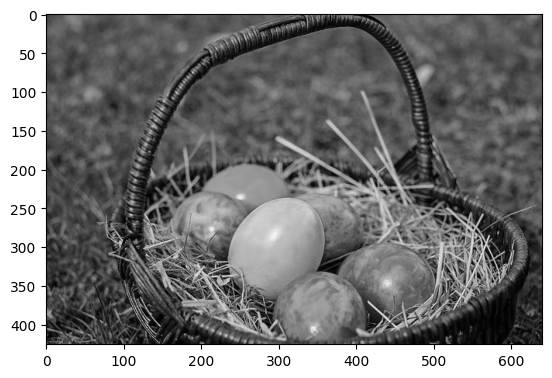

(426, 640, 3)
(426, 640)


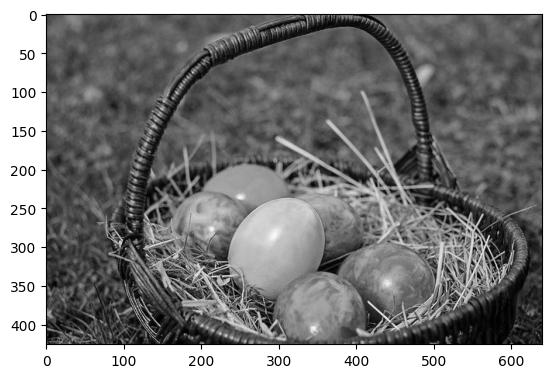

In [81]:
import numpy as np
from PIL import Image  #이미지 보여주는 라이브러리 
import matplotlib.pyplot as plt

color_img = Image.open('./images/fruits.jpg')
plt.imshow(color_img)
plt.show()


# 이미지 객체 -> numpy 객체 
color_pixel = np.array(color_img)
print(color_pixel.shape)

gray_pixel = color_pixel.copy()
#print(gray_pixel.shape[1])
for y in range(gray_pixel.shape[0]):  # gray로 만드는 구문
    for x in range(gray_pixel.shape[1]): #이미지는 for문 돌릴때 y축부터 
        gray_pixel[y, x] = np.mean(gray_pixel[y, x])

plt.imshow(gray_pixel)
plt.show()
print(gray_pixel.shape)

# plt.imshow(color_pixel)
# plt.show()

#흑백 이미지를 2차원 표현
gray_2d_pixel = gray_pixel[:, :, 0]
print(gray_2d_pixel.shape)

plt.imshow(gray_2d_pixel, 'gray')
plt.show()

(429, 640, 3)
(1, 429, 640, 3)
(1, 429, 640, 1)
(3, 3, 1, 1)
(1, 427, 638, 1)
(1, 142, 212, 1)


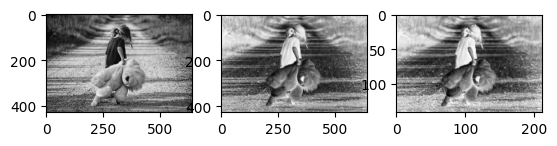

In [24]:
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import matplotlib.image as img 

fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)
ori_img = img.imread('images\girl.jpg')

ax1.imshow(ori_img)
print(ori_img.shape)

# convolution -> API
# API -> 4차원 (이미지 개수, 세로 ,가로 , 채널)
# (429, 640, 3) -> (1, 429, 640, 3)
input_image = ori_img.reshape((1,) + ori_img.shape)
input_image = input_image.astype(np.float32) # 정수값 => float로 변환 
print(input_image.shape)

ch1_input_img = input_image[:, :, :, 0:1]   #슬라이싱 기법 / 채널을 줄여서 사이즈를 줄이기 위해
print(ch1_input_img.shape)

#(1, 429, 640, 1)
filter = np.array([[[[-1]], [[0]], [[0]]],
                   [[[0]], [[-1]], [[0]]],
                   [[[0]], [[0]], [[-1]]]])
print(filter.shape)

conv2d = tf.nn.conv2d(
    ch1_input_img, 
    filter,
    strides = [1, 1, 1, 1],
    padding = 'VALID' #패딩을 고려x, 원래값으로 
)

conv2d_result = conv2d.numpy()
print(conv2d_result.shape)

t_img = conv2d_result[0, :, :, :]
ax2.imshow(t_img, cmap = 'gray')

#pooling
pool = tf.nn.max_pool(
    conv2d_result,
    ksize = [1, 3, 3, 1],
    strides = [1, 3, 3, 1],
    padding = 'VALID'
)
pool_result = pool.numpy()
print(pool_result.shape)
t_img = pool_result[0, :, :, :]
ax3.imshow(t_img, cmap = 'gray')

Found 2004 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
[1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1.]
(20,)
[1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1.]


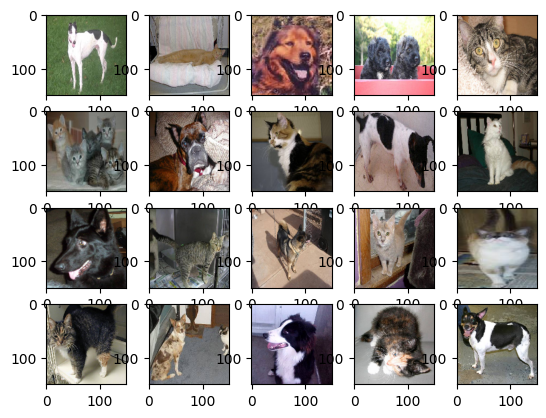

In [5]:
#ImageDataGenerator 이용
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

#path
train_dir = './cat_dog_small/train'
validation_dir = './cat_dog_small/validation'

#생성
train_datagen = ImageDataGenerator(rescale = 1/255)  # 0 ~ 1까지 정규화
validation_datagen = ImageDataGenerator(rescale = 1/255)

#설정
train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes = ['cats', 'dogs'],  #타켓, 레이블
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    classes = ['cats', 'dogs'],  #타켓, 레이블
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

# generator 동작확인

# 한번에 20개 이미지 가져와서 띄우기
fig = plt.figure()
axs = []

for i in range(20):
    axs.append(fig.add_subplot(4, 5, i+1))

for data_batch, label_batch in train_generator:
    print(data_batch.shape)
    print(label_batch)

    for idx, img_data in enumerate(data_batch):
        axs[idx].imshow(img_data)
    
    print(label_batch.shape)
    print(label_batch)
    break

In [6]:
import numpy as np  
import tensorflow as tf 
from tensorflow.keras.models import Sequential # model, box
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

#1. model 생성
model = Sequential()

#2. model에 layer 추가

#### 1
model.add(Conv2D(
    filters = 32,
    kernel_size = (3, 3), 
    strides = (1, 1),
    padding = 'valid',
    activation = 'relu',
    input_shape = (150, 150, 3)
))
model.add(MaxPooling2D(
    pool_size = (2, 2)
))

#### 2
model.add(Conv2D(
    filters = 64,
    kernel_size = (3, 3), 
    strides = (1, 1),
    padding = 'valid',
    activation = 'relu'
))
model.add(MaxPooling2D(
    pool_size = (2, 2)
))


####3
model.add(Conv2D(
    filters = 128,
    kernel_size = (3, 3), 
    strides = (1, 1),
    padding = 'valid',
    activation = 'relu'
))
model.add(MaxPooling2D(
    pool_size = (2, 2)
))

####4
model.add(Conv2D(
    filters = 256,
    kernel_size = (3, 3), 
    strides = (1, 1),
    padding = 'valid',
    activation = 'relu'
))
model.add(MaxPooling2D(
    pool_size = (2, 2)
))

####5
model.add(Conv2D(
    filters = 512,
    kernel_size = (3, 3), 
    strides = (1, 1),
    padding = 'valid',
    activation = 'relu'
))
model.add(MaxPooling2D(
    pool_size = (2, 2)
))

model.add(Flatten())
model.add(Dense(
    units = 1,
    activation = 'sigmoid'
))
########
model.summary()

model.compile(
    optimizer = Adam(learning_rate = 0.001),
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

model.fit(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50,
    verbose = 1
)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)      

KeyboardInterrupt: 

In [7]:
from tensorflow.keras.applications import VGG16

model_base = VGG16(
    weights = 'imagenet',
    include_top = False, # filter만 가져옴
    input_shape = (150, 150, 3)
)

model_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [8]:
# VGG16 -> 전이학습
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# 1.모델생성
model = Sequential()

# 2.VGG16으로 대체 
model_base = VGG16(
    weights = 'imagenet',
    include_top = False, # filter만 가져옴
    input_shape = (150, 150, 3)
)

# 3.특성 추출
model_base.trainable = False # 이미 완성된 필터만 사용, 변경하지 않을것

model.add(model_base)

model.add(Flatten())

model.add(Dense(
    units = 1,
    activation = 'sigmoid'
))
model.summary()

# 모델 설정
model.compile(
    optimizer = Adam(learning_rate = 1e-4),
    loss = 'binary_crossentropy',
    metrics = ['acc']
)

# 학습
model.fit(
    train_generator,
    steps_per_epoch = 100,  #2000 / 20 = 100
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50,  #1000 / 20 = 50
    verbose = 1
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 8193      
                                                                 
Total params: 14722881 (56.16 MB)
Trainable params: 8193 (32.00 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Epoch 1/30
 65/100 [==================>...........] - ETA: 32s - loss: 0.6207 - acc: 0.6612

KeyboardInterrupt: 